# Regression task


Imports

In [2]:
import configparser
import pandas as pd
from sklearn.linear_model import LinearRegression
import logging
import matplotlib.pyplot as plt


Read the configuration file

In [50]:
config = configparser.ConfigParser()
config.read("config.ini")

['config.ini']

Configure a logger

In [51]:
logger = logging.getLogger(__name__)
logger.setLevel(level=config['Logging']['level'])

## Prepare the data

Load the dataset

In [52]:
data_fname = config['RegressionData']['data_file']
logger.info(f"Loading data from file: {data_fname}")
df_input = pd.read_excel(data_fname)
logger.info(f"Loading completed. Data shape: {df_input.shape}")
df_input.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Trim the variable names to the first occurrence of an opening bracket and remove trailing spaces

In [53]:
df_input.rename(columns={key: key.split('(')[0].rstrip(' ') for key in df_input.keys()}, inplace=True)
df_input.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


split dataset into input and target


In [54]:
df_input.keys()

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [55]:
target_var = df_input.keys()[int(config['RegressionData']['target_column'])]
target_var

'Concrete compressive strength'

In [56]:
df_target = df_input.loc[:, target_var]
df_input.drop(target_var, axis=1, inplace=True)
input_vars = list(df_input.keys())
input_vars

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age']

In [57]:
n = len(input_vars)  # number of input variables
nt = n + 1           # number of all variables (including the target)

## Data visualisation

Display historgams of all variables

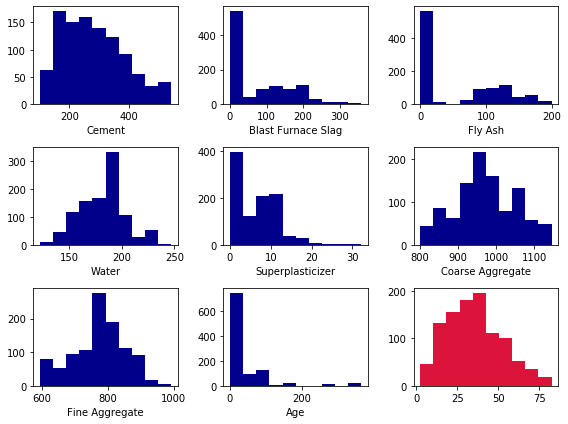

In [58]:
fig, axes = plt.subplots(nt//3 + (1 if nt%3 else 0), 3, figsize=(8, 6))
for i, input_var in enumerate(input_vars):
    ax = axes[i//3, i%3]
    ax.hist(df_input.loc[:, input_var], color='darkblue', lw=1)
    ax.set_xlabel(input_var)
axes[-1, n%3].hist(df_target, color='crimson')
fig.tight_layout()
plt.show()


Display a 2D plot depicting the target variable as a function of each of the input variables

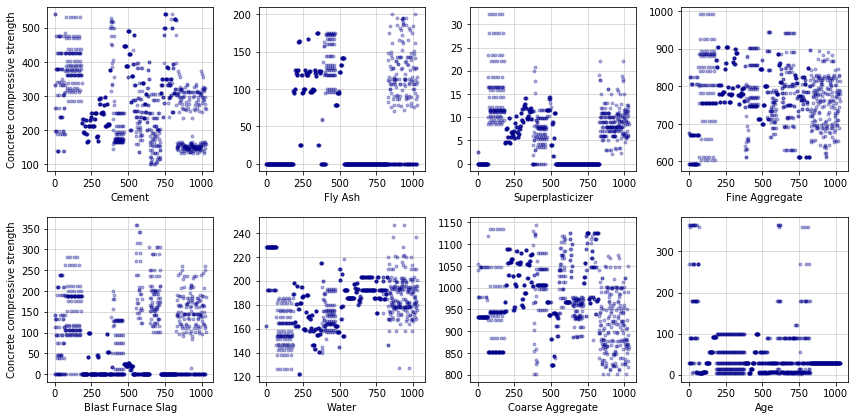

In [59]:
fig, axes = plt.subplots(2, n//2 + n%2, figsize=(12, 6))
for i, input_var in enumerate(input_vars):
    ax = axes[i%2, i//2]
    ax.plot(df_input.loc[:, input_var], '.', color='darkblue', alpha=0.3)
    ax.grid(color='lightgray')
    ax.set_xlabel(input_var)
    if not i//2:
        ax.set_ylabel(target_var)
fig.tight_layout()
plt.show()


## Regression
Define a multivariate linear regression model and perform the fit on the data

In [60]:
fitter = LinearRegression()
fitter.fit(df_input, df_target)

print(f"Score: {fitter.score(df_input, df_target):.3f}")


Score: 0.615


In [61]:
fitter

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)